In [1]:
pip install numpy pandas scikit-learn matplotlib tensorflow


  Obtaining dependency information for tensorflow from https://files.pythonhosted.org/packages/ed/1a/b4ab4b8f8b3a41fade4899fd00b5b2d2dad0981f3e1bb10df4c522975fd7/tensorflow-2.15.0.post1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for absl-py>=1.0.0 from https://files.pythonhosted.org/packages/01/e4/dc0a1dcc4e74e08d7abedab278c795eef54a224363bb18f5692f416d834f/absl_py-2.0.0-py3-none-any.whl.metadata
  Obtaining dependency information for flatbuffers>=23.5.26 from https://files.pythonhosted.org/packages/6f/12/d5c79ee252793ffe845d58a913197bfa02ae9a0b5c9bc3dc4b58d477b9e7/flatbuffers-23.5.26-py2.py3-none-any.whl.metadata
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 686.9 kB/s eta 0:00:001m775.2 kB/s eta 0:00:01
  Obtaining dependency information for libclang>=13.0.0 from https://files.pythonhosted.org/packages/ea/df/55525e489c43f9dbb6c8ea27d8a567b3dcd18a22f3c45483055f5ca6611d/libclang-16.0.6-py2.py3-none-manylinux2010_x8

  Obtaining dependency information for google-auth-oauthlib<2,>=0.5 from https://files.pythonhosted.org/packages/71/bf/9e125754d1adb3bc4bd206c4e5df756513b1d23675ac06caa471278d1f3f/google_auth_oauthlib-1.2.0-py2.py3-none-any.whl.metadata
  Obtaining dependency information for protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<5.0.0dev,>=3.20.3 from https://files.pythonhosted.org/packages/01/cb/445b3e465abdb8042a41957dc8f60c54620dc7540dbcf9b458a921531ca2/protobuf-4.23.4-cp37-abi3-manylinux2014_x86_64.whl.metadata
  Obtaining dependency information for tensorboard-data-server<0.8.0,>=0.7.0 from https://files.pythonhosted.org/packages/73/c6/825dab04195756cf8ff2e12698f22513b3db2f64925bdd41671bfb33aaa5/tensorboard_data_server-0.7.2-py3-none-manylinux_2_31_x86_64.whl.metadata
  Obtaining dependency information for cachetools<6.0,>=2.0.0 from https://files.pythonhosted.org/packages/a2/91/2d843adb9fbd911e0da45fbf6f18ca89d07a087c3daa23e955584f90ebf4/cachetools-5.3.2-py3-none-any.whl.

In [16]:

# Load the datasets
msft_data = pd.read_csv('msft_data.csv')
goog_data = pd.read_csv('goog_data.csv')
amzn_data = pd.read_csv('amzn_data.csv')
sentiment_data = pd.read_csv('daily_sentiment_index.csv')

# Add ticker_symbol column
msft_data['ticker_symbol'] = 'MSFT'
goog_data['ticker_symbol'] = 'GOOG'
amzn_data['ticker_symbol'] = 'AMZN'

# Concatenate the dataframes
combined_data = pd.concat([msft_data, goog_data, amzn_data])

# If necessary, reorder the columns to match the desired structure
combined_data = combined_data[['Date', 'ticker_symbol', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume', 'SMA_30', 'EMA_30', '%K', '%R', 'RSI_14']]

# Save the combined data to a new CSV file
#combined_data.to_csv('combined_tech_indicators.csv', index=False)
combined_data.head(35)

,Date,ticker_symbol,Open,High,Low,Close,Adj Close,Volume,SMA_30,EMA_30,%K,%R,RSI_14
0,2015-01-02,MSFT,46.660000,47.419998,46.540001,46.759998,40.452744,27913900,NaN,46.759998,NaN,NaN,NaN
1,2015-01-05,MSFT,46.369999,46.730000,46.250000,46.330002,40.080746,39673900,NaN,46.732256,NaN,NaN,NaN
2,2015-01-06,MSFT,46.380001,46.750000,45.540001,45.650002,39.492462,36447900,NaN,46.662433,NaN,NaN,NaN
3,2015-01-07,MSFT,45.980000,46.459999,45.490002,46.230000,39.994228,29114100,NaN,46.634535,NaN,NaN,NaN
4,2015-01-08,MSFT,46.750000,47.750000,46.720001,47.590000,41.170780,29645200,NaN,46.696177,NaN,NaN,NaN
5,2015-01-09,MSFT,47.610001,47.820000,46.900002,47.189999,40.824741,23944200,NaN,46.728037,NaN,NaN,NaN
6,2015-01-12,MSFT,47.419998,47.540001,46.360001,46.599998,40.314331,23651900,NaN,46.719776,NaN,NaN,NaN
7,2015-01-13,MSFT,46.970001,47.910000,46.060001,46.360001,40.106701,35270600,NaN,46.696565,NaN,NaN,NaN
8,2015-01-14,MSFT,45.959999,46.240002,45.619999,45.959999,39.760643,29719600,NaN,46.649045,NaN,NaN,NaN
9,2015-01-15,MSFT,46.220001,46.380001,45.410000,45.480000,39.345394,32750800,NaN,46.573622,NaN,NaN,NaN


In [17]:
# Sort the DataFrame by 'Date' and 'ticker_symbol'
sorted_data = combined_data.sort_values(by=['Date', 'ticker_symbol'])

# Now, sorted_data is sorted first by Date, then by ticker_symbol for each date
# Save to CSV if needed
sorted_data.head(35)


,Date,ticker_symbol,Open,High,Low,Close,Adj Close,Volume,SMA_30,EMA_30,%K,%R,RSI_14
0,2015-01-02,AMZN,15.629000,15.737500,15.348000,15.426000,15.426000,55664000,NaN,15.426000,NaN,NaN,NaN
0,2015-01-02,GOOG,26.378078,26.490770,26.133251,26.168653,26.168653,28951268,NaN,26.168653,NaN,NaN,NaN
0,2015-01-02,MSFT,46.660000,47.419998,46.540001,46.759998,40.452744,27913900,NaN,46.759998,NaN,NaN,NaN
1,2015-01-05,AMZN,15.350500,15.419000,15.042500,15.109500,15.109500,55484000,NaN,15.405581,NaN,NaN,NaN
1,2015-01-05,GOOG,26.091366,26.144720,25.582764,25.623152,25.623152,41196796,NaN,26.133459,NaN,NaN,NaN
1,2015-01-05,MSFT,46.369999,46.730000,46.250000,46.330002,40.080746,39673900,NaN,46.732256,NaN,NaN,NaN
2,2015-01-06,AMZN,15.112000,15.150000,14.619000,14.764500,14.764500,70380000,NaN,15.364221,NaN,NaN,NaN
2,2015-01-06,GOOG,25.679497,25.738087,24.983908,25.029282,25.029282,57998800,NaN,26.062222,NaN,NaN,NaN
2,2015-01-06,MSFT,46.380001,46.750000,45.540001,45.650002,39.492462,36447900,NaN,46.662433,NaN,NaN,NaN
3,2015-01-07,AMZN,14.875000,15.064000,14.766500,14.921000,14.921000,52806000,NaN,15.335626,NaN,NaN,NaN


In [18]:
combined_data_with_sentiment = sorted_data.merge(sentiment_data, on=['Date', 'ticker_symbol'])

# Check the first few rows to confirm it looks correct
combined_data_with_sentiment.head(35)

,Date,ticker_symbol,Open,High,Low,Close,Adj Close,Volume,SMA_30,EMA_30,%K,%R,RSI_14,sentiment_index
0,2015-01-02,AMZN,15.629000,15.737500,15.348000,15.426000,15.426000,55664000,NaN,15.426000,NaN,NaN,NaN,0.035714
1,2015-01-02,GOOG,26.378078,26.490770,26.133251,26.168653,26.168653,28951268,NaN,26.168653,NaN,NaN,NaN,0.000000
2,2015-01-02,MSFT,46.660000,47.419998,46.540001,46.759998,40.452744,27913900,NaN,46.759998,NaN,NaN,NaN,-0.095238
3,2015-01-05,AMZN,15.350500,15.419000,15.042500,15.109500,15.109500,55484000,NaN,15.405581,NaN,NaN,NaN,0.019231
4,2015-01-05,GOOG,26.091366,26.144720,25.582764,25.623152,25.623152,41196796,NaN,26.133459,NaN,NaN,NaN,-0.042553
5,2015-01-05,MSFT,46.369999,46.730000,46.250000,46.330002,40.080746,39673900,NaN,46.732256,NaN,NaN,NaN,0.157895
6,2015-01-06,AMZN,15.112000,15.150000,14.619000,14.764500,14.764500,70380000,NaN,15.364221,NaN,NaN,NaN,0.192308
7,2015-01-06,GOOG,25.679497,25.738087,24.983908,25.029282,25.029282,57998800,NaN,26.062222,NaN,NaN,NaN,0.042857
8,2015-01-06,MSFT,46.380001,46.750000,45.540001,45.650002,39.492462,36447900,NaN,46.662433,NaN,NaN,NaN,0.333333
9,2015-01-07,AMZN,14.875000,15.064000,14.766500,14.921000,14.921000,52806000,NaN,15.335626,NaN,NaN,NaN,0.200000


In [40]:
combined_data_with_sentiment.to_csv('final_combined_data.csv', index=False)

In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Fill NaN values with 0 
combined_data_with_sentiment.fillna(0, inplace=True)

# Normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
features_columns = combined_data_with_sentiment.columns.difference(['Date', 'ticker_symbol'])
combined_data_with_sentiment[features_columns] = scaler.fit_transform(combined_data_with_sentiment[features_columns])

# Define a function to create sequences
def create_sequences(input_data, n_steps):
    X, y = [], []
    for i in range(n_steps, len(input_data)):
        X.append(input_data.iloc[i-n_steps:i][features_columns].values)
        y.append(input_data.iloc[i]['Close'])  # Assuming 'Close' is the column to predict
    return np.array(X), np.array(y)

In [42]:
n_steps = 50  # Number of timesteps in sequences
X, y = create_sequences(combined_data_with_sentiment, n_steps)

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Now let's define the LSTM model
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout

model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(n_steps, len(features_columns))))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])


In [43]:
# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.1)

Epoch 1/100
84/84 [==============================] - 6s 35ms/step - loss: 0.0226 - mae: 0.1135 - val_loss: 0.0188 - val_mae: 0.1135
Epoch 2/100
84/84 [==============================] - 2s 25ms/step - loss: 0.0172 - mae: 0.1024 - val_loss: 0.0167 - val_mae: 0.1038
Epoch 3/100
84/84 [==============================] - 2s 25ms/step - loss: 0.0174 - mae: 0.1012 - val_loss: 0.0162 - val_mae: 0.1016
Epoch 4/100
84/84 [==============================] - 2s 25ms/step - loss: 0.0169 - mae: 0.1008 - val_loss: 0.0160 - val_mae: 0.1025
Epoch 5/100
84/84 [==============================] - 2s 24ms/step - loss: 0.0161 - mae: 0.0990 - val_loss: 0.0150 - val_mae: 0.1005
Epoch 6/100
84/84 [==============================] - 2s 24ms/step - loss: 0.0145 - mae: 0.0943 - val_loss: 0.0120 - val_mae: 0.0912
Epoch 7/100
84/84 [==============================] - 2s 24ms/step - loss: 0.0107 - mae: 0.0810 - val_loss: 0.0064 - val_mae: 0.0659
Epoch 8/100
84/84 [==============================] - 2s 25ms/step - loss: 0.

84/84 [==============================] - 2s 26ms/step - loss: 6.0607e-04 - mae: 0.0179 - val_loss: 1.2360e-04 - val_mae: 0.0092
Epoch 61/100
84/84 [==============================] - 2s 28ms/step - loss: 4.9418e-04 - mae: 0.0164 - val_loss: 1.1157e-04 - val_mae: 0.0080
Epoch 62/100
84/84 [==============================] - 2s 25ms/step - loss: 5.7181e-04 - mae: 0.0174 - val_loss: 8.4387e-05 - val_mae: 0.0070
Epoch 63/100
84/84 [==============================] - 2s 27ms/step - loss: 5.4837e-04 - mae: 0.0170 - val_loss: 7.0934e-05 - val_mae: 0.0063
Epoch 64/100
84/84 [==============================] - 2s 29ms/step - loss: 5.6771e-04 - mae: 0.0171 - val_loss: 1.0518e-04 - val_mae: 0.0076
Epoch 65/100
84/84 [==============================] - 2s 28ms/step - loss: 5.0413e-04 - mae: 0.0166 - val_loss: 1.7967e-04 - val_mae: 0.0100
Epoch 66/100
84/84 [==============================] - 3s 33ms/step - loss: 5.2293e-04 - mae: 0.0168 - val_loss: 1.9281e-04 - val_mae: 0.0113
Epoch 67/100
84/84 [======

In [44]:
# Evaluate the model
loss, mae = model.evaluate(X_test, y_test)

24/24 [==============================] - 0s 8ms/step - loss: 1.0972e-04 - mae: 0.0086


In [45]:
# Predict and visualize results
predicted_stock_price = model.predict(X_test)


24/24 [==============================] - 1s 8ms/step


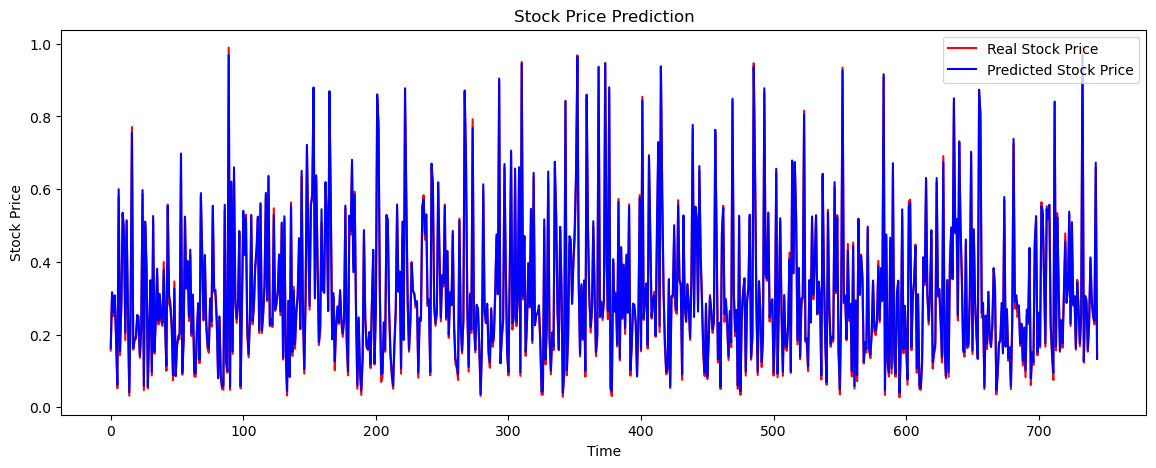

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(14,5))
plt.plot(y_test, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

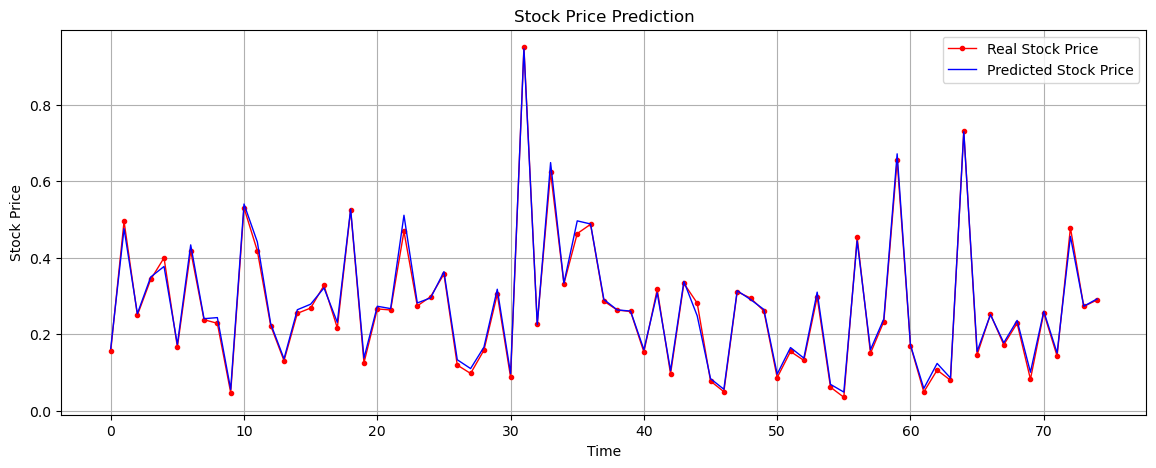

In [47]:
import matplotlib.pyplot as plt

n = 10 
subset_y_test = y_test[::n]
subset_predicted_stock_price = predicted_stock_price[::n]

plt.figure(figsize=(14,5))

# Use markers for actual points and a line for predicted
plt.plot(subset_y_test, marker='o', color='red', linestyle='-', linewidth=1, markersize=3, label='Real Stock Price')
plt.plot(subset_predicted_stock_price, color='blue', linestyle='-', linewidth=1, label='Predicted Stock Price')

plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)  # Add gridlines

plt.show()


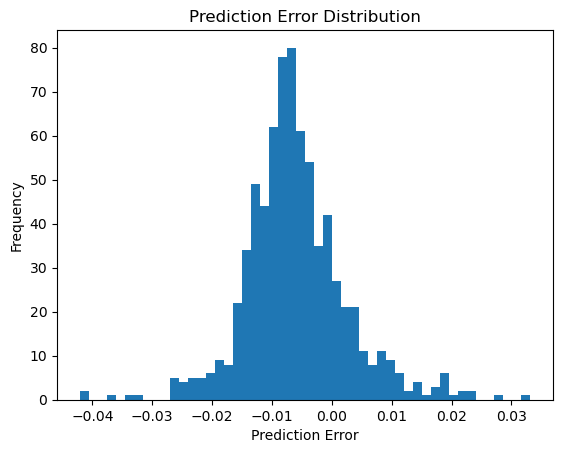

In [48]:
errors = y_test - predicted_stock_price.flatten()
plt.hist(errors, bins=50)
plt.title('Prediction Error Distribution')
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.show()


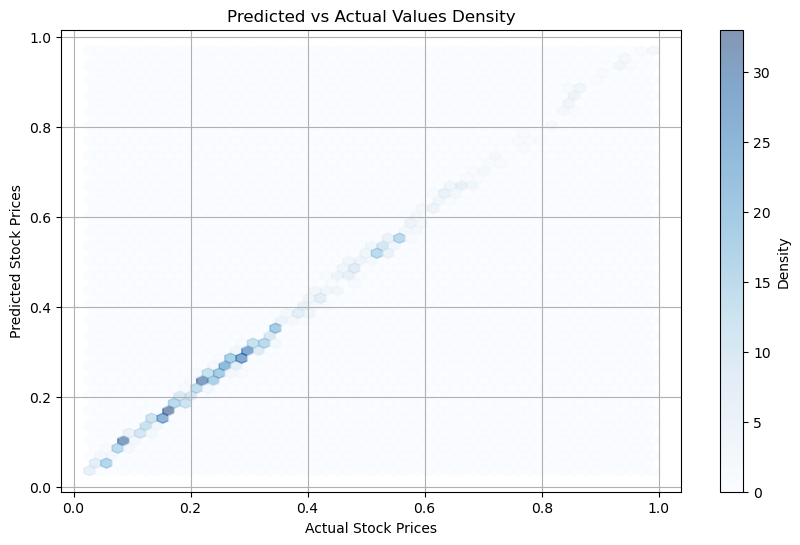

In [54]:
plt.figure(figsize=(10, 6))
plt.hexbin(y_test, predicted_stock_price.flatten(), gridsize=50, cmap='Blues', alpha=0.5)
plt.colorbar(label='Density')
plt.title('Predicted vs Actual Values Density')
plt.xlabel('Actual Stock Prices')
plt.ylabel('Predicted Stock Prices')
plt.grid(True)
plt.show()


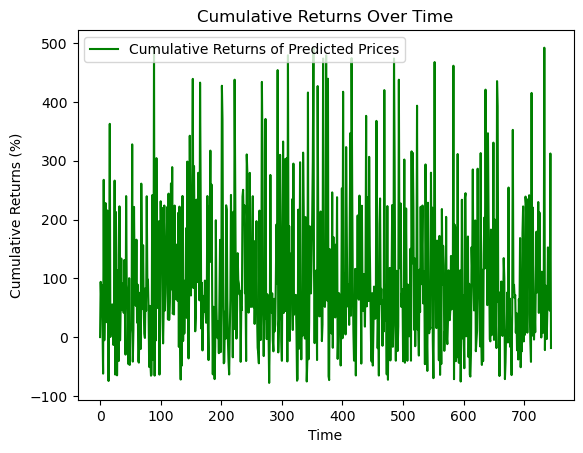

In [51]:
# This assumes `predicted_stock_price` can be directly translated to returns
cumulative_returns = (predicted_stock_price / predicted_stock_price[0] - 1) * 100
plt.plot(cumulative_returns, color='green', label='Cumulative Returns of Predicted Prices')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Time')
plt.ylabel('Cumulative Returns (%)')
plt.legend()
plt.show()



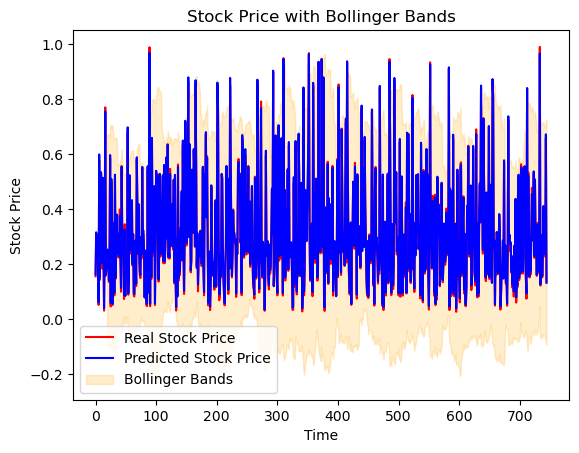

In [52]:
# Calculate moving average and standard deviation
rolling_mean = pd.Series(y_test).rolling(window=20).mean()
rolling_std = pd.Series(y_test).rolling(window=20).std()

# Calculate upper and lower Bollinger Bands
upper_band = rolling_mean + (rolling_std * 2)
lower_band = rolling_mean - (rolling_std * 2)

plt.plot(y_test, color='red', label='Real Stock Price')
plt.plot(predicted_stock_price, color='blue', label='Predicted Stock Price')
plt.fill_between(range(len(y_test)), lower_band, upper_band, color='orange', alpha=0.2, label='Bollinger Bands')
plt.title('Stock Price with Bollinger Bands')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()